<h1>Temporal Difference model</h1>

<h2>QUESTIONS</h2>

<ul>
<li>"Thus, component q of the state vector is 1 if the stimulus presentation was exactly q 1 time steps ago and 0 otherwise" ??</li>
</ul>

<h3>Importations</h3>

In [1]:
from matplotlib import pyplot as plt
from random import *
import numpy as np

##from __future__ import division

##from bokeh.core.properties import Any, Dict, Instance, String
##from bokeh.io import show
##from bokeh.models import ColumnDataSource, Div, Column,  LayoutDOM

<h3>Discretisation</h3>

In [2]:
T = 5
N = 50 #time steps occurrence
h = T/N #time step scale

<h3>Parameters</h3>

In [3]:
gamma = 0.98 #discount factor
alpha = 0.5 #learning rate
lamb = 0.9 #eligibility trace parameter

<h3>Variables initialization</h3>

In [4]:
k = 1 #stimuli occurrence
x = [[0 for t in range(N)] for i in range(k)] #state vectors of the stimuli, between 0.5 to 2 seconds
w = [[0 for t in range(N)] for i in range(k)] #weights vector per stimulus
r = [0 for t in range(N)] #reward

<h3>Reward prediction</h3>

In [5]:
pl = [[x[i][t]*w[i][t] for t in range(N)] for i in range(k)] #reward predictions
P = pl[0] #total reward prediction
if k > 1:
    for t in range(N):
        for i in range(1,k): #begin at 1 <-- P = pl[0]
            P[t] += pl[i][t]

<h3>Temporal difference</h3>

In [6]:
TD = [0]
for t in range(1,N):
    TD.append(P[t-1] - gamma*P[t])

<h3>Prediction error</h3>

In [7]:
delta = [(r[t] - TD[t]) for t in range(N)]

<h3>Eligibility trace</h3>

In [8]:
e = [[0] for i in range(k)]

for t in range(1,N):
    for i in range(k):
        e[i].append(lamb*e[i][t-1] + x[i][t-1])

<h3>Weight change</h3>

In [9]:
delta_w = [[alpha * delta[t] * e[i][t] for t in range(N)] for i in range(k)] #the last time step is ignored

for t in range(N):
    for i in range(k):
        w[i][t] +=  delta_w[i][t] #weights update

In [20]:
trials = 5
for j in range(trials):
    x = [[0 for t in range(N)] for i in range(k)]
    r = [0 for t in range(N)]
        
    for i in range(k):
        stimulus = randint(5,35)
        x[i][stimulus] = 1
        r[stimulus + 10] = 1
    
    # action
    for t in range(N):
        for i in range(k):          
            pl[i][t] = x[i][t] * w[i][t] #reward predictions
            P[t] += pl[i][t]
            
            if t >= 1: # ==0 at t=0, either way it isn't an N-sized list
                e[i][t] = lamb*e[i][t-1] + x[i][t-1]
                TD[t] =  P[t-1] - gamma * P[t] # <0 when predicts a reward at time step t+1
            
            delta[t] = r[t] - TD[t]
            
            delta_w[i][t] = alpha * delta[t] * e[i][t]
            w[i][t] += delta_w[i][t]

<h4>Values</h4>

In [21]:
for i in range(N):
    if r[i] != 0: print("r", i*h, r[i])
    #if w[0][i] != 0: print("w", i*h, w[0][i])
    if x[0][i] != 0: print("x", i*h, x[0][i])
    if delta[i] != 0: print("prediction error", i*h,delta[i])

x 2.3000000000000003 1
prediction error 2.3000000000000003 -0.7593441584400002
prediction error 2.4000000000000004 0.7748409780000003
r 3.3000000000000003 1
prediction error 3.3000000000000003 1.0


<h4>Plot</h4>

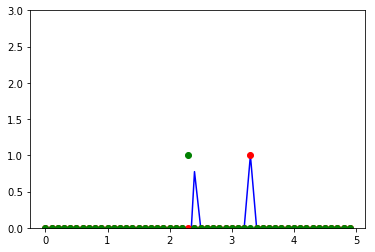

In [22]:
axisx = np.arange(0,T,h)
plt.plot(axisx, delta, 'b', axisx, r, 'ro', axisx, x[0], 'go')
# axes limits
axes = plt.gca()
axes.set_ylim([0, 3])
plt.show()